# Decision Tree

### Content:
    Methods
    Class distribution
    Baseline model for comparison
    Feature selection
    Model tuning
    Final results
    Conclusions

### Methods

### This tab is about applying Decision Tree to this research. So the first question is that what are Decision Tree?

### As the name suggests, Decision tree is a flow like a tree structure working on the principle of conditions. It is efficient and has strong algorithms used for predictive analysis. It's mainly attributes include internal nodes, branches and a terminal node. And these concepts is close to the structure of a tree.

### Internal node: every internal node holds a “test” on an attribute
### Branches: every branch holds the conclusion of the test
### Leaf node:  every leaf node means the class label. 

### This is the most used algorithm when it comes to supervised learning techniques. It is used for both classifications as well as regression. It is often termed as “CART” that means Classification and Regression Tree. Tree algorithms are always preferred due to stability and reliability.  

### And for this problem, the tree will test each attributes ( attributes) of Twitter accounts and combine these test information to get the conclusion, whether this twitter is retweeted or not.

#### Prepare Data for Decision Tree(Record data)

In [52]:
import pandas as pd
df = pd.read_csv("data/01-modified-data/cleaned_data_r.csv")

In [53]:
df=df.drop(['Unnamed: 0',"id"], axis=1)
df.head()
df.loc[df['lang'] == "en" , 'lang'] = "1"
df.loc[df['lang'] != "en" , 'lang'] = '0'
df.loc[df['retweet_count'] > 0 , 'retweet'] = '1'
df.loc[df['retweet_count'] == 0 , 'retweet'] = '0'
df = df.drop("retweeted",axis = 1)
df = df.drop("retweet_count",axis = 1)

#### Let's take a look of our labeled text data as it shows below.

In [80]:
df.head()

,truncated,favorite_count,favorited,lang,followers_count,friends_count,favourites_count,has_extended_profile,retweet
0,False,0,False,0,5,7,8,True,1
1,False,0,False,0,1,2,2,True,0
2,False,0,False,0,1,7,1,True,1
3,False,0,False,0,5,5,1,True,1
4,False,0,False,0,7,9,2,True,1


#### Data preparation includes extracting dependent variable, retweet, whether the tweet is retweeted or not and texts as input. And it also includes the process of spliting training and testing sets. We split the record data into train and test with 70% trainning ratio.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:7], df["retweet"], test_size=0.3, random_state=0)

### Class distribution

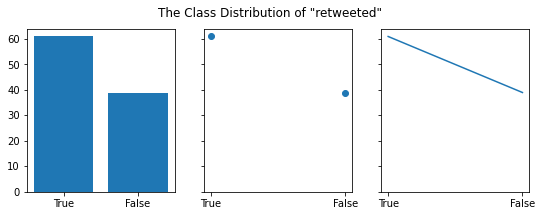

In [58]:
import matplotlib.pyplot as plt
data = df["retweet"]
from collections import Counter
data = Counter(data)
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(["True", "False"], values)
axs[1].scatter(["True", "False"], values)
axs[2].plot(["True", "False"], values)
fig.suptitle('The Class Distribution of "retweeted"')
plt.show()

In [59]:
print(data)

Counter({'1': 61, '0': 39})


### The output Y has two class, "True" and "False", about 60% of the all dataset is "Ture" while 40% of the all dataset is "False". Such a proportion is beneficial to classification. If there are too many or too few proportion of categories, such as 90% or 10% of categories, the final accuracy will be poor. But under this dataset, this should not be the case.

### Baseline model for comparison

#### In this part we use a random classifier

### For generate_label_data(), we choose the same proportion as above, that is, class_labels=[True,False] weights=[0.61,0.39]

In [60]:
import random
import numpy as np
def generate_label_data(class_labels, weights,N=10000):
    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())
    print("count of labels:",Counter(y).values()) # counts the elements frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y
#TEST
y=generate_label_data([True,False],[0.61,0.39],10000)

-----GENERATING DATA-----
unique entries: dict_keys([True, False])
count of labels: dict_values([6169, 3831])
probability of labels: [0.6169 0.3831]


In [61]:
## RANDOM CLASSIFIER
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
def random_classifier(y_data):
    ypred=[]
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:",Counter(ypred).values()) # counts the elements' frequency
    print("probability of prediction:",np.fromiter(Counter(ypred).values(),dtype=float)/len(y_data)) # counts the elements' frequency
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data,ypred))
print("\nBINARY CLASS: UNIFORM LOAD")
y=generate_label_data([True,False],[0.61,0.39],10000)
random_classifier(y)


BINARY CLASS: UNIFORM LOAD
-----GENERATING DATA-----
unique entries: dict_keys([True, False])
count of labels: dict_values([6024, 3976])
probability of labels: [0.6024 0.3976]
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([5002, 4998])
probability of prediction: [0.5002 0.4998]
accuracy 0.5
percision, recall, fscore, (array([0.39764094, 0.60244098]), array([0.50025151, 0.499834  ]), array([0.44308309, 0.54636182]), array([3976, 6024]))


### Feature selection

#### In this part, I choose to do feature selection using SelectFromModel
#### As we know, linear models penalized with the L1-norm have sparse solutions, that is, many of estimated coefficients are zero to reduce the dimensionality of the data. In particular, sparse estimators useful for this purpose are the Lasso for regression, and of logisticRegression and LinearSVC for classification, and in this part, we choose to use LinearSVC as we want to apply SVM to our dataset. And we use the function, cross_val_score to get the best feature combination.

In [62]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print(X_train.shape)
lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)
X_t = model.transform(X_test)
print(X_new.shape)
print(X_t.shape)
print("We can know that, we select",X_new.shape[1],"of  features in this process.")

(70, 7)
(70, 4)
(30, 4)
We can know that, we select 4 of  features in this process.


### Model tuning

#### The "max_depth" hyper-parameter lets us control the number of layers in our tree.

#### In this part, we will iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

In [67]:
# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(X_new,y_train)

    yp_train=model.predict(X_new)
    yp_test=model.predict(X_t)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label='0'),recall_score(y_test, yp_test,pos_label='1')])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label='0'),recall_score(y_train, yp_train,pos_label='1')])

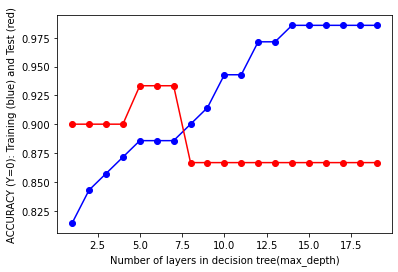

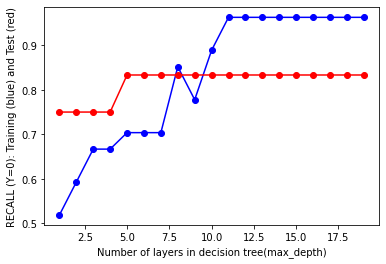

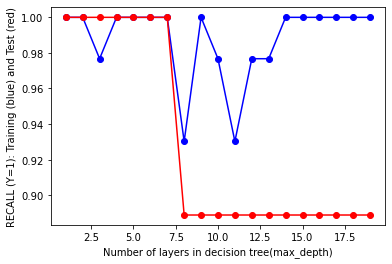

In [68]:
# INSERT CODE TO GENERATE THE THREE PLOTS BELOW (SEE EXPECTED OUTPUT FOR EXAMPLE)
ttr = pd.DataFrame(train_results)
tte = pd.DataFrame(test_results)
plt.plot(ttr[0],ttr[1],'o-',color = 'b')
plt.plot(tte[0],tte[1],'o-',color = 'r')
plt.xlabel("Number of layers in decision tree(max_depth)")
plt.ylabel("ACCURACY (Y=0): Training (blue) and Test (red)")
plt.show()
plt.plot(ttr[0],ttr[2],'o-',color = 'b')
plt.plot(tte[0],tte[2],'o-',color = 'r')
plt.xlabel("Number of layers in decision tree(max_depth)")
plt.ylabel("RECALL (Y=0): Training (blue) and Test (red)")
plt.show()
plt.plot(ttr[0],ttr[3],'o-',color = 'b')
plt.plot(tte[0],tte[3],'o-',color = 'r')
plt.xlabel("Number of layers in decision tree(max_depth)")
plt.ylabel("RECALL (Y=1): Training (blue) and Test (red)")
plt.show()

#### From the above three plots, we can find that when max_depth = 7, the set has the highest test error and the highest recall scores for retweet = 1 and retweet = 0, so it is the set of hyper-parameters with the lowest training AND test error.

### Final results

#### We re-train the decision tree using the optimal hyper-parameter obtained from the plot above.

In [69]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=7)
model = model.fit(X_new,y_train)
yp_train=model.predict(X_new)
yp_test=model.predict(X_t)

------TRAINING------
ACCURACY: 0.8857142857142857
NEGATIVE RECALL (Y=0): 0.7037037037037037
NEGATIVE PRECISION (Y=0): 1.0
NEGATIVE RECALL (Y=1): 1.0
NEGATIVE PRECISION (Y=1): 0.8431372549019608
[[19  8]
 [ 0 43]]


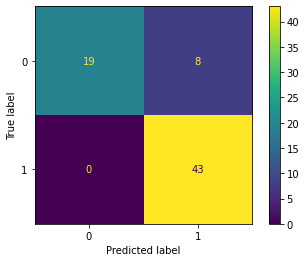

------TEST------
ACCURACY: 0.9333333333333333
NEGATIVE RECALL (Y=0): 0.8333333333333334
NEGATIVE PRECISION (Y=0): 1.0
NEGATIVE RECALL (Y=1): 1.0
NEGATIVE PRECISION (Y=1): 0.9
[[10  2]
 [ 0 18]]


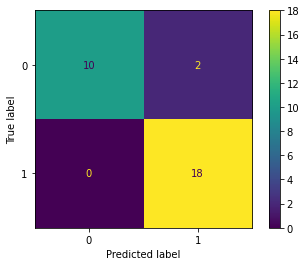

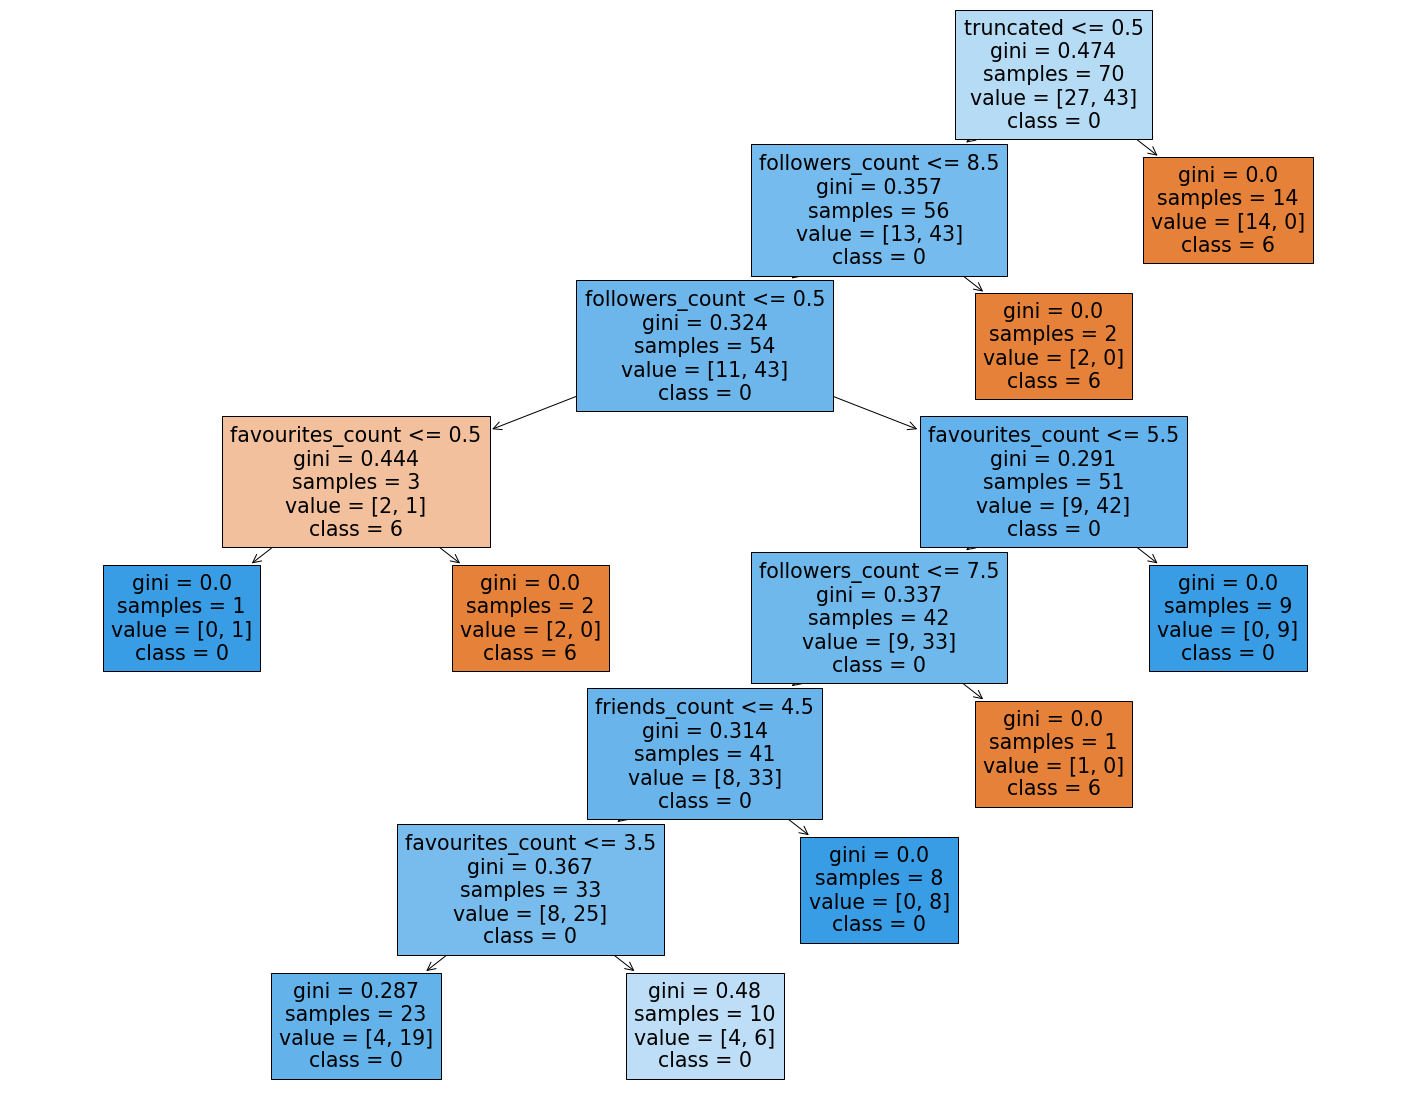

In [81]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
def confusion_plot(y_data,y_pred):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    print("ACCURACY: "+str(accuracy_score(y_data,y_pred)))
    print("NEGATIVE RECALL (Y=0): "+str(recall_score(y_data,y_pred,pos_label='0')))
    print("NEGATIVE PRECISION (Y=0): "+str(precision_score(y_data,y_pred,pos_label='0')))
    print("NEGATIVE RECALL (Y=1): "+str(recall_score(y_data,y_pred,pos_label='1')))
    print("NEGATIVE PRECISION (Y=1): "+str(precision_score(y_data,y_pred,pos_label='1')))
    print(confusion_matrix(y_data,y_pred))
    cm = confusion_matrix(y_data, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()
def plot_tree(model,X,Y):
    from sklearn import tree
    Y= y_train.drop_duplicates()
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(model, 
                   feature_names=["truncated","followers_count","friends_count","favourites_count"],
                   class_names=list(str(Y)),
                   filled=True)
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)
plot_tree(model,X_new,y_train)

#### The performances in this decision tree is good with accurancy of 84.3% in the testing set and 70.37% in the training set. As we have done dimension reduction, Decision is suitable for this problem as the distinction in different attributes is large. However, we find that the accruacy of training set is worse than that of testing set. Thus, we should use more data to detect whether this model is suitable as the sample size increases.

### Conclusions:

#### In general, the above results show us a phenomenon that we can judge whether such tweets can be retweeted and attract people's attention through the analysis of the information of Twitter accounts. And the tweets retweeted have similarities as they have several friends and followers and they always have an extended profile, that is, they take their Twitter account seriously. 
#### As a popular social media, Twitter can not only enhance people's sense of social belonging, but also help them gain attention, reputation, fans and profit from it if they can get more forwarding volume and attention from it. For such an information age, it is beneficial for both the platform and bloggers to receive more attention.
#### Such a study makes me more confident to observe the effect of the account information on improving the quality of user accounts by comparing tendency with the number of users' fans and the number of users' likes of tweets and more personality.